### Импорт библдиотеки и считывание 'csv' файла 

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfc = pd.read_csv('credit_data.csv')
dfc.head()

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2


Размер таблицы данных

In [3]:
dfc.shape

(150000, 8)

### Список заголовков столбцов, переименование

In [4]:
list(dfc)
dfc.columns

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents', 'age_group'],
      dtype='object')

In [5]:
dfc.rename(columns={'MonthlyIncome':'M_Income','NumberOfOpenCreditLinesAndLoans':'OpenCrLines',
                    'NumberRealEstateLoansOrLines': 'RealEstateLoans', 'NumberOfDependents':'N_ofDependents'}, inplace=True)

In [6]:
dfc.head()

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,N_ofDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2


### Сумма и доля  пропусков в каждом столбце

In [7]:
dfc.isnull().sum()

defaulted              0
age                    0
DebtRatio              0
M_Income           29731
OpenCrLines            0
RealEstateLoans        0
N_ofDependents      3924
age_group              0
dtype: int64

In [8]:
dfc.isnull().mean()

defaulted          0.000000
age                0.000000
DebtRatio          0.000000
M_Income           0.198207
OpenCrLines        0.000000
RealEstateLoans    0.000000
N_ofDependents     0.026160
age_group          0.000000
dtype: float64

### Доля заемщиков кторые не выплатили кредит 'defaulted'

In [9]:
dfc['defaulted'].mean()

0.06684

In [10]:
dfc['defaulted'].value_counts()

0    139974
1     10026
Name: defaulted, dtype: int64

### Средний доход выше среднего M_Income, кол-во по доходам, сумма всего

In [11]:
dfc_avg = dfc['M_Income'].mean() # среднее занчение len(df[df['team']=='A'])
dfc[dfc['M_Income'] > dfc_avg].value_counts('M_Income')

M_Income
10000.0      1466
7000.0       1223
8000.0       1127
7500.0       1051
10500.0      1013
             ... 
13102.0         1
13108.0         1
13113.0         1
13115.0         1
3008750.0       1
Length: 7654, dtype: int64

In [12]:
len(dfc[dfc['M_Income'] > dfc_avg])

44146

### Вычислите медианный возраст заемщиков, которые не вернули кредит (defaulted=1), он больше или меньше медианного возраста всех заемщиков?

In [13]:
dfc.groupby('defaulted')['age'].median()

defaulted
0    52.0
1    45.0
Name: age, dtype: float64

In [14]:
age1 = dfc[(dfc['defaulted']==1)].median()['age']
print(age1)

45.0


In [15]:
age2 =dfc['age'].median()
print(age2)

52.0


In [16]:
print('разность возраста не вернувших кредит и всех заемщиков:', age1 - age2)

разность возраста не вернувших кредит и всех заемщиков: -7.0


### Сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке?

In [17]:
avg = dfc['M_Income'].mean()

dfc[(dfc['age']> 40) & (dfc['M_Income'] > avg)]

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,N_ofDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
4,0,49,0.024926,63588.0,7,1,0.0,2
9,0,57,0.606291,23684.0,9,4,2.0,3
12,0,46,0.298354,12454.0,13,2,2.0,2
15,0,64,0.209892,11362.0,7,1,2.0,3
...,...,...,...,...,...,...,...,...
149979,1,55,0.057235,8700.0,7,0,0.0,3
149981,0,43,0.121752,6849.0,4,0,4.0,2
149989,0,62,0.001408,9233.0,4,0,3.0,3
149991,0,59,0.477658,10316.0,10,2,0.0,3


### Вычисление новых признаков и группировка данных, группировка заемщиков на 3 возрастные группы:

In [18]:
splits = dfc.groupby('age_group')
splits.count()

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,N_ofDependents
age_group,,,,,,,
1,10758,10758,10758,9053,10758,10758,10328
2,59376,59376,59376,50600,59376,59376,58690
3,79866,79866,79866,60616,79866,79866,77058


Количество заемщиков в каждой возрастной группе 
Визуализация данные в виде гистограммы

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

### Количество заемщиков в каждой возрастной группе (age_group)

In [21]:
age_g = dfc['age_group'].value_counts()
print(age_g)

3    79866
2    59376
1    10758
Name: age_group, dtype: int64


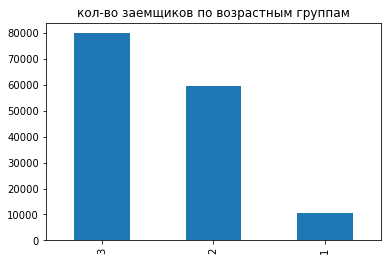

In [22]:
plt.title('кол-во заемщиков по возрастным группам')
age_g.plot(kind="bar");

кол-во заемщиков, которые не вернули кредит, по возрастным группам 

In [23]:
dfc.groupby('defaulted')['age_group'].value_counts()

defaulted  age_group
0          3            76367
           2            54093
           1             9514
1          2             5283
           3             3499
           1             1244
Name: age_group, dtype: int64

### кол-во(доля %) заемщиков, которые не вернули кредит, по возрастным группам 

age_group
1    0.115635
2    0.088975
3    0.043811
Name: defaulted, dtype: float64


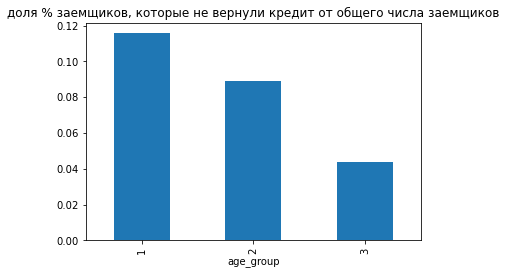

In [24]:
age_g1 = dfc.groupby('age_group')['defaulted'].mean()
print(age_g1);
plt.title('доля % заемщиков, которые не вернули кредит от общего числа заемщиков') 
age_g1.plot(kind="bar");

### кол-во заемщиков, которые не вернули кредит

2    5283
3    3499
1    1244
Name: age_group, dtype: int64


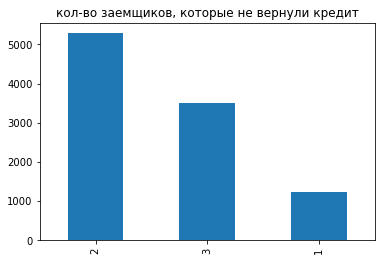

In [25]:
def_1 = dfc[dfc['defaulted']==1]['age_group'].value_counts();
print(def_1);
def_1.plot.bar();
plt.title('кол-во заемщиков, которые не вернули кредит'); 

### Вычислите новый признак alone_and_poor, который равен 1 у заемщиков, которые не содержат никого, кроме себя (NumberOfDependents == 0) и у которых месячный доход (MonthlyIncome) меньше 10% квантили по этому признаку среди всех заемщиков. Инече этот признак сделайте равным 0

Максмальный месячный доход у заемщиков которые содержат только себя 

In [26]:
dfc[(dfc['N_ofDependents']==0)]['M_Income'].max() #sort_values(ascending=False)

1794060.0

Определение квантили max месячного дохода 

In [27]:
dfc_kvan =  dfc['M_Income'].quantile(.10)
print(dfc_kvan)

2005.0


### Определения у кого из заемщиков котрые не содеражт никого кроме себя доход ниже 10% квантили дохода всех заемщиков, добавление столбца 'alone_and_poor' с признаком  1  и 0, подсчет кол-во 'alone_and_poor'

In [28]:
dfc['alone_and_poor']= np.where(dfc['M_Income'] < dfc_kvan, '1', '0')

In [29]:
dfc[(dfc['N_ofDependents']==0) & (dfc['M_Income'] < dfc_kvan)].sort_values('M_Income',ascending = False)

,defaulted,age,DebtRatio,M_Income,OpenCrLines,RealEstateLoans,N_ofDependents,age_group,alone_and_poor
73555,0,70,0.058853,2004.0,1,0,0.0,3,1
133958,0,30,0.175561,2004.0,3,0,0.0,1,1
112030,0,69,0.147705,2003.0,6,0,0.0,3,1
109759,0,58,0.006990,2002.0,1,0,0.0,3,1
111366,0,72,0.846730,2002.0,15,2,0.0,3,1
...,...,...,...,...,...,...,...,...,...
52475,1,24,382.000000,0.0,3,0,0.0,1,1
126777,0,40,164.000000,0.0,12,0,0.0,2,1
52961,0,80,3617.000000,0.0,11,5,0.0,3,1
53004,0,26,6.000000,0.0,2,0,0.0,1,1


In [30]:
dfc['alone_and_poor'].value_counts()

0    137974
1     12026
Name: alone_and_poor, dtype: int64

### Визуализация полученных данных 

In [31]:
from matplotlib import pyplot as plt

<AxesSubplot:ylabel='Frequency'>

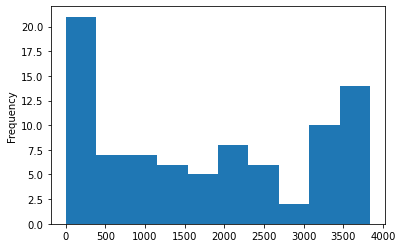

In [32]:
age_plot = dfc['age'].value_counts() # распределения возрастов всех заемщиков
age_plot.plot.hist( x = 'age')

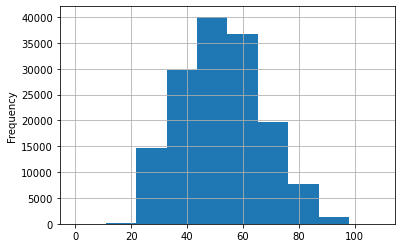

In [33]:
dfc['age'].plot.hist( x = 'age') # распределения возрастов всех заемщиков
plt.grid()

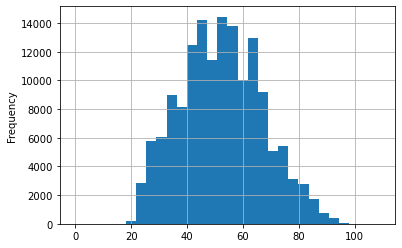

In [34]:
dfc['age'].plot.hist(bins=30) # распределения возрастов всех заемщиков поделенное на 30 интервалов
plt.grid()

Визуализация полученных данных с библиотекой  seaborn

In [35]:
import seaborn as sns

### Распределения числа открытых кредитных линий

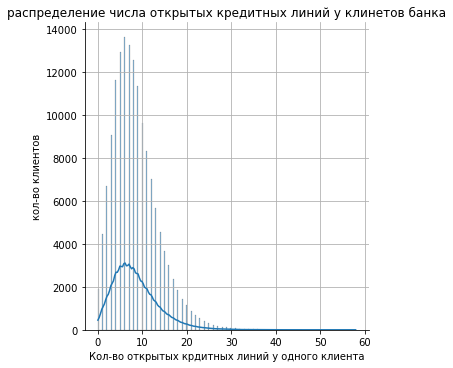

In [36]:
sns.displot(x = dfc.OpenCrLines, kde=True)
plt.grid()
plt.title('распределение числа открытых кредитных линий у клинетов банка')
plt.xlabel('Кол-во открытых крдитных линий у одного клиента')
plt.ylabel('кол-во клиентов');

 ### Распределение признака NumberOfDependents для заемщиков, которые успешно вернули кредит

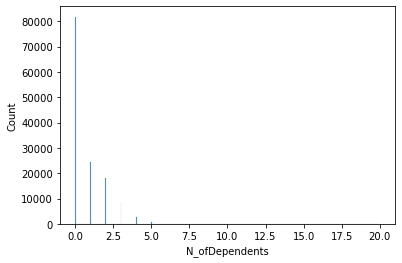

In [37]:
dfc_defau = dfc[(dfc['N_ofDependents'] >=0) & (dfc['defaulted'] == 0)]

sns.histplot(data = dfc_defau , x = 'N_ofDependents');